<a href="https://colab.research.google.com/github/dangtrantrung/TensorFlow_Keras/blob/master/TensorFlow_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
print(keras.__version__)

2.15.0


In [2]:
import tensorflow
from tensorflow import keras
print(keras)

<KerasLazyLoader>


In [3]:
import tensorflow  as tf
# Conv2D
input_shape=(4,30,30,3)
x=tf.random.normal(input_shape)
y=tf.keras.layers.Conv2D(2,3,activation='relu',input_shape=input_shape[1:])(x)
print(y.shape)


(4, 28, 28, 2)


In [4]:
# CNN model
inputs=keras.layers.Input(shape=[32,32,3])
x=keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu')(inputs)
x=keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu')(x)
predictions=keras.layers.MaxPool2D(pool_size=2)(x)

model=keras.Model(inputs=inputs,outputs=predictions)


In [5]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
Total params: 10144 (39.62 KB)
Trainable params: 10144 (39.62 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
predictions.shape

TensorShape([None, 16, 16, 32])

In [7]:
inputs.shape

TensorShape([None, 32, 32, 3])

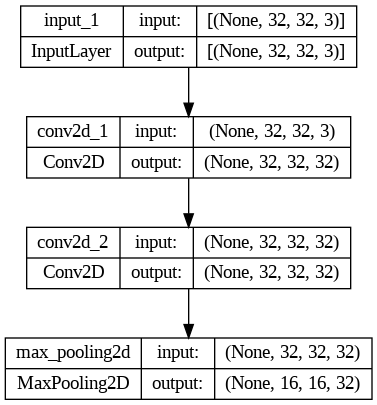

In [8]:
keras.utils.plot_model(model,'model.png',show_shapes=True)

In [9]:
# Model Sequential
model_v1=tf.keras.Sequential([
    keras.layers.Dense(1024,input_dim=64),
    keras.layers.Activation('relu'),
    keras.layers.Dense(256),
    keras.layers.Activation('softmax')]
)

In [10]:
model_v1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              66560     
                                                                 
 activation (Activation)     (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 256)               262400    
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
Total params: 328960 (1.25 MB)
Trainable params: 328960 (1.25 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
model_v1.inputs

[<KerasTensor: shape=(None, 64) dtype=float32 (created by layer 'dense_input')>]

In [12]:
model_v1.outputs

[<KerasTensor: shape=(None, 256) dtype=float32 (created by layer 'activation_1')>]

In [13]:
model_v2=tf.keras.Sequential()
model_v2.add( keras.layers.Dense(1024,input_dim=64))
model_v2.add( keras.layers.Activation('relu'))
model_v2.add(keras.layers.Dense(256,activation='softmax',kernel_initializer='random_normal'))
model_v2.add(keras.layers.Dense(10,activation='softmax',kernel_initializer='random_normal'))

model_v2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1024)              66560     
                                                                 
 activation_2 (Activation)   (None, 1024)              0         
                                                                 
 dense_3 (Dense)             (None, 256)               262400    
                                                                 
 dense_4 (Dense)             (None, 10)                2570      
                                                                 
Total params: 331530 (1.26 MB)
Trainable params: 331530 (1.26 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
model_v2.compile(optimizer='SGD',loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
import numpy as np

In [16]:
# Sample Data

data=np.random.random((2000,64))
label=np.random.random((2000,10))

valid_data=np.random.random((500,64))
valid_label=np.random.random((500,10))

test_data=np.random.random((500,64))
test_label=np.random.random((500,10))


In [17]:
data.shape, type(model_v2)

((2000, 64), keras.src.engine.sequential.Sequential)

In [33]:
model_v2.fit(data, label, epochs=100, batch_size=50, validation_data=(valid_data, valid_label))

Epoch 1/100
40/40 [==============================] - 1s 7ms/step - loss: 11.5216 - accuracy: 0.1155 - val_loss: 11.5310 - val_accuracy: 0.1020
Epoch 2/100
40/40 [==============================] - 0s 4ms/step - loss: 11.5216 - accuracy: 0.1155 - val_loss: 11.5310 - val_accuracy: 0.1020
Epoch 3/100
40/40 [==============================] - 0s 4ms/step - loss: 11.5215 - accuracy: 0.1155 - val_loss: 11.5310 - val_accuracy: 0.1020
Epoch 4/100
40/40 [==============================] - 0s 4ms/step - loss: 11.5215 - accuracy: 0.1155 - val_loss: 11.5310 - val_accuracy: 0.1020
Epoch 5/100
40/40 [==============================] - 0s 4ms/step - loss: 11.5217 - accuracy: 0.1155 - val_loss: 11.5310 - val_accuracy: 0.1020
Epoch 6/100
40/40 [==============================] - 0s 4ms/step - loss: 11.5215 - accuracy: 0.1155 - val_loss: 11.5310 - val_accuracy: 0.1020
Epoch 7/100
40/40 [==============================] - 0s 4ms/step - loss: 11.5213 - accuracy: 0.1155 - val_loss: 11.5311 - val_accuracy: 0.1020

In [19]:
model_v2.evaluate(test_data,test_label)

16/16 [==============================] - 0s 3ms/step - loss: 11.5622 - accuracy: 0.0940


[11.562179565429688, 0.09399999678134918]

In [20]:
results=model_v2.predict(test_data)

16/16 [==============================] - 0s 2ms/step


In [21]:
results.shape

(500, 10)

In [25]:
results[0:10][0]

array([0.10204957, 0.09569108, 0.09571774, 0.10301384, 0.10824418,
       0.1067678 , 0.09315227, 0.10114346, 0.09758276, 0.09663732],
      dtype=float32)

In [26]:
test_label[0:10][0]

array([0.50744851, 0.22098103, 0.46882194, 0.78210094, 0.05660426,
       0.90250769, 0.03908042, 0.65567298, 0.64171387, 0.82318734])